<a href="https://colab.research.google.com/github/SanjiAp/analytics/blob/main/AnalyticsVidya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135529 entries, 0 to 135528
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     135529 non-null  int64  
 1   Product_ID                  135529 non-null  object 
 2   Gender                      135529 non-null  object 
 3   Age                         135529 non-null  object 
 4   Occupation                  135529 non-null  int64  
 5   City_Category               135529 non-null  object 
 6   Stay_In_Current_City_Years  135529 non-null  object 
 7   Marital_Status              135529 non-null  int64  
 8   Product_Category_1          135529 non-null  int64  
 9   Product_Category_2          93339 non-null   float64
 10  Product_Category_3          41376 non-null   float64
 11  Purchase                    135528 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 12.4+ MB


In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.355290e+05,135529.000000,135529.000000,135529.000000,93339.000000,41376.000000,135528.000000
mean,1.002809e+06,8.088549,0.409093,5.301559,9.854691,12.659054,9300.093700
std,1.721283e+03,6.535047,0.491668,3.742286,5.085732,4.120779,4980.141216
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001322e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5847.000000
50%,1.002664e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8051.000000
75%,1.004258e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12057.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [8]:
data.isnull().sum()/ len(data)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.311299
Product_Category_3            0.694707
Purchase                      0.000007
dtype: float64

### We can see 69% of missing values in Prod_category_2
### also purchase is missing a  single value so we can remove that

In [9]:
data.dropna(subset=['Purchase'], inplace = True)  

In [10]:
data.isnull().sum()/ len(data)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.311301
Product_Category_3            0.694705
Purchase                      0.000000
dtype: float64

In [11]:
data.drop(['Product_Category_2', 'Product_Category_3'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


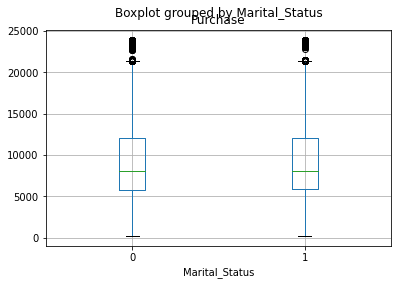

In [15]:
from matplotlib import pyplot as plt
def plotNumericVsCategorical(x, y, df):
  #print(df)
  df.boxplot(column = x, by = y )


plotNumericVsCategorical('Purchase','Marital_Status',data)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


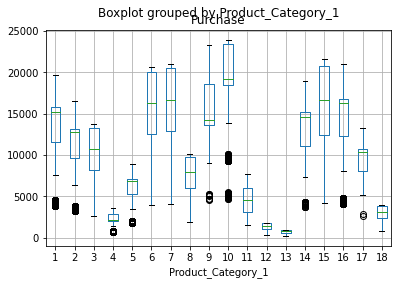

In [16]:
plotNumericVsCategorical('Purchase','Product_Category_1',data)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


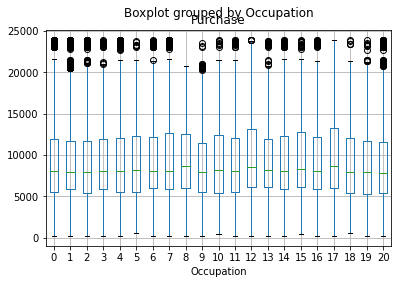

In [17]:
plotNumericVsCategorical('Purchase','Occupation',data)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


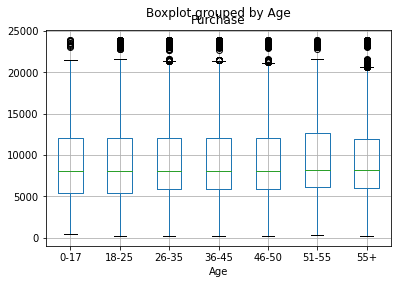

In [18]:
plotNumericVsCategorical('Purchase','Age',data)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


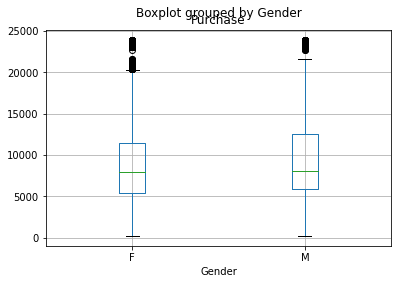

In [19]:
plotNumericVsCategorical('Purchase','Gender',data)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


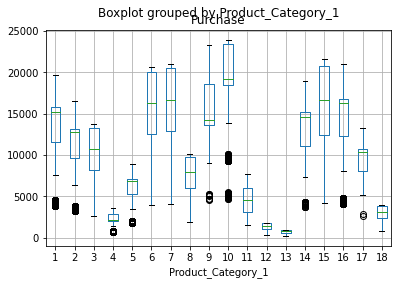

In [20]:
plotNumericVsCategorical('Purchase','Product_Category_1',data)

In [27]:
#df1=data.select_dtypes(exclude=['object'])
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [29]:
cat_columns = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

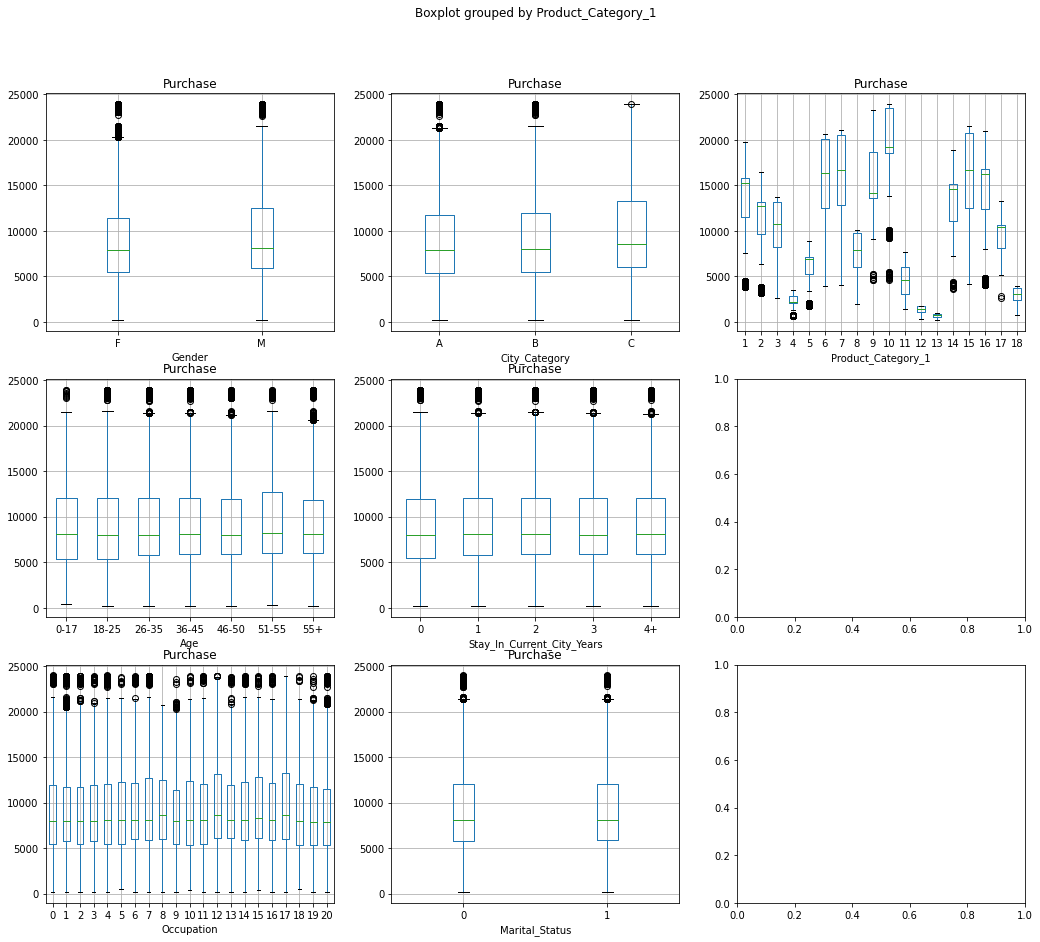

In [40]:
f, axes = plt.subplots(3,3, figsize = (17,15))
i = j = 0
for column in cat_columns:
        #plt.figure(figsize=(17,1))
        #print(axes)
        #print(column)
        data.boxplot( column = 'Purchase', by = column , ax= axes[i][j])#axes.flatten()[:8])
        i += 1
        #i %= 3
        if i == 3:
          j += 1
          i = 0

plt.show()

In [42]:
test = pd.read_csv("test.csv")
train_users = list(data['User_ID'].unique())
test_users = list(test['User_ID'].unique())

In [43]:
both_users = set(train_users).intersection(set(test_users))

In [44]:
len(both_users)

5862

In [50]:
len( set(test_users)) - len(both_users)

29

In [51]:
train_prods = set(list(data['Product_ID'].unique()))
test_prods = set(list(test['Product_ID'].unique()))

In [53]:
both_prods = train_prods.intersection(test_prods)

In [55]:
len(both_prods)

3325

In [54]:
len(test_prods) - len(both_prods) 

166

In [ ]:
scaler = MinMaxScaler()